# ASSIGNMENT 1

Pima Indians Diabetes Database.
It consists 768 tuples each having 9 attributes.

In [1]:
import pandas as pd
#imported the dataset given to us
pid=pd.read_csv("C:\\Users\\Micontroller Lab N16\\IIT MANDI\\3rd Week\\pima-indians-diabetes.csv",sep=',')
#made a copy of the original dataset
pid1=pid.copy()
print(pid1)
#looked for any null value present in the dataset
print(pid1.isnull().sum())



     pregs  plas  pres  skin  test   BMI   pedi  Age  class
0        6   148    72    35     0  33.6  0.627   50      1
1        1    85    66    29     0  26.6  0.351   31      0
2        8   183    64     0     0  23.3  0.672   32      1
3        1    89    66    23    94  28.1  0.167   21      0
4        0   137    40    35   168  43.1  2.288   33      1
..     ...   ...   ...   ...   ...   ...    ...  ...    ...
763     10   101    76    48   180  32.9  0.171   63      0
764      2   122    70    27     0  36.8  0.340   27      0
765      5   121    72    23   112  26.2  0.245   30      0
766      1   126    60     0     0  30.1  0.349   47      1
767      1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]
pregs    0
plas     0
pres     0
skin     0
test     0
BMI      0
pedi     0
Age      0
class    0
dtype: int64


In [2]:
pid.columns
#created a list of all the columns present in the dataset
pid_col=list(pid.columns)
pid2=pid.copy()
pid_col
pid_col1=pid_col.copy()
#we do not want to bring changes in the class column so we removed it from the copied dataset
pid_col1.remove('class')
pid2.drop(["class"], axis = 1, inplace = True)
print(pid_col1)
print(pid2)

['pregs', 'plas', 'pres', 'skin', 'test', 'BMI', 'pedi', 'Age']
     pregs  plas  pres  skin  test   BMI   pedi  Age
0        6   148    72    35     0  33.6  0.627   50
1        1    85    66    29     0  26.6  0.351   31
2        8   183    64     0     0  23.3  0.672   32
3        1    89    66    23    94  28.1  0.167   21
4        0   137    40    35   168  43.1  2.288   33
..     ...   ...   ...   ...   ...   ...    ...  ...
763     10   101    76    48   180  32.9  0.171   63
764      2   122    70    27     0  36.8  0.340   27
765      5   121    72    23   112  26.2  0.245   30
766      1   126    60     0     0  30.1  0.349   47
767      1    93    70    31     0  30.4  0.315   23

[768 rows x 8 columns]


Question 1. Write a python program to

a. Normalize all the attributes, except class attribute, of pima-indians-diabetes.csv
using min-max normalization to transform the data in the range [0-1]. Save the file as
pima-indians-diabetes-Normalised.csv

b. Standardize, all the attributes, except class attribute, of pima-indians-
diabetes.csv using z-normalization. Save the file as pima-indians-
diabetes-Standardised.csv

In [3]:
#Using minmaxscaler function from scikit-learn library for min max normalization
from sklearn.preprocessing import MinMaxScaler
pid1_mms=pid2.copy() 
scaler = MinMaxScaler(feature_range=(0,1))
print(scaler.fit(pid1_mms))                                     #fitting the model
pid1_mms=scaler.fit_transform(pid1_mms)
print(pid1_mms)                                                  #normalized dataset
print('\n\n')



MinMaxScaler()
[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]





In [4]:
#Using StandardScaler function from scikit-learn library for standardization.
#from sklearn.preprocessing import StandardScaler
#pid1_ss=pid2.copy() 
#scaler = StandardScaler()
#standard_df = scaler.fit_transform(pid1_ss)                      #fitting the model
#print(pid1_ss)         

#standardized dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pid1_ss=pid2.copy()

# Fit on training set only.
StandardScaler().fit(pid1_ss)
pid1_ss= scaler.fit_transform(pid1_ss)
print(pid1_ss)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Question 2. Split the data of each class from pima-indians-diabetes.csv into train data and test
data. Train data contain 70% of tuples from each of the class and test data contain remaining
30% of tuples from each class. Save the train data as diabetes-train.csv and save the
test data as diabetes-test.csv
a. Classify every test tuple using K-nearest neighbor (KNN) method for the different values
of K (1, 3, 5, 7, 9, 11, 13, 15, 17, 21). Perform the following analysis :
i. Find confusion matrix (use ‘confusion_matrix’) for each K.
ii. Find the classification accuracy (You can use ‘accuracy_score’) for each K. Note the
value of K for which the accuracy is high.

In [5]:
X1 = pid2                  # X denotes the input functions and here class defines whether the person is ill or not
print(X1)
y1 = pid['class']                  #y denotes the output functions
print(y1)

     pregs  plas  pres  skin  test   BMI   pedi  Age
0        6   148    72    35     0  33.6  0.627   50
1        1    85    66    29     0  26.6  0.351   31
2        8   183    64     0     0  23.3  0.672   32
3        1    89    66    23    94  28.1  0.167   21
4        0   137    40    35   168  43.1  2.288   33
..     ...   ...   ...   ...   ...   ...    ...  ...
763     10   101    76    48   180  32.9  0.171   63
764      2   122    70    27     0  36.8  0.340   27
765      5   121    72    23   112  26.2  0.245   30
766      1   126    60     0     0  30.1  0.349   47
767      1    93    70    31     0  30.4  0.315   23

[768 rows x 8 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split       #As given we are assigning 70% of data for training and 30% for testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.7,random_state = 42)

print(X1_train)
print(y1_train)
print(X1_test)
print(y1_test)

     pregs  plas  pres  skin  test   BMI   pedi  Age
334      1    95    60    18    58  23.9  0.260   22
139      5   105    72    29   325  36.9  0.159   28
485      0   135    68    42   250  42.3  0.365   24
547      4   131    68    21   166  33.1  0.160   28
18       1   103    30    38    83  43.3  0.183   33
..     ...   ...   ...   ...   ...   ...    ...  ...
71       5   139    64    35   140  28.6  0.411   26
106      1    96   122     0     0  22.4  0.207   27
270     10   101    86    37     0  45.6  1.136   38
435      0   141     0     0     0  42.4  0.205   29
102      0   125    96     0     0  22.5  0.262   21

[537 rows x 8 columns]
334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: class, Length: 537, dtype: int64
     pregs  plas  pres  skin  test   BMI   pedi  Age
668      6    98    58    33   190  34.0  0.430   43
324      2   112    75    32     0  35.7  0.148   21
624      2   108    64     0     0  30.8  0

Predicted Outcomes for neighbours = 1 are [0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0]


Accuracy =  0.6883116883116883


Confusion Matrix =  [[113  38]
 [ 34  46]]



Predicted Outcomes for neighbours = 3 are [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 

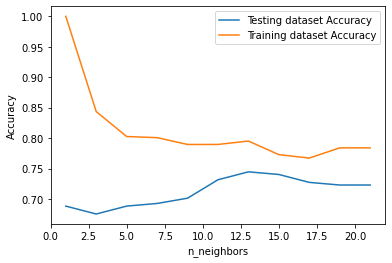

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
neighbors=[1,3,5,7,9,11,13,15,17,19,21]
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
acc=[]
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train, y1_train)
    y_pred= knn.predict(X1_test)
    print('Predicted Outcomes for neighbours =',k,'are',y_pred )
    print('\n')
    
    print('Accuracy = ',knn.score(X1_test, y1_test))
    print('\n')
    if ((knn.score(X1_test, y1_test))>=0):
        acc.append(knn.score(X1_test, y1_test)) 
        
    matrix = confusion_matrix(y1_test,y_pred)
    print('Confusion Matrix = ',matrix)
    print('\n\n')
    
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X1_train, y1_train)
    test_accuracy[i] = knn.score(X1_test, y1_test)
    
print(acc)
print('\n')
print('maximum accuracy is =', max(acc)*100)
  
# Generate plot for classification vs k graph for diffrent values of k
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')


  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Question 3. Split the data of each class from pima-indians-diabetes-Normalised.csv into
train data and test data. Train data should contain same 70% of tuples in Question 2 from
each of the class and test data contain remaining same 30% of tuples from each class. Save the

train data as diabetes-train-normalise.csv and save the test data as diabetes-
test-normalise.csv

a. Classify every test tuple using K-nearest neighbor (KNN) method for the different values
of K (1, 3, 5, 7, 9, 11, 13, 15, 17, 21). Perform the following analysis :
i. Find confusion matrix (use ‘confusion_matrix’) for each K.
ii. Find the classification accuracy (You can use ‘accuracy_score’) for each K. Note the
value of K for which the accuracy is high.

In [8]:
X2 = pid1_mms
print(X2)
y2 =  pid['class']
print(y2)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.7, random_state = 42)

print(X2_train)
print(y2_train)
print(X2_test)
print(y2_test)

[[0.05882353 0.47738693 0.49180328 ... 0.3561848  0.07771136 0.01666667]
 [0.29411765 0.52763819 0.59016393 ... 0.54992548 0.03458582 0.11666667]
 [0.         0.67839196 0.55737705 ... 0.63040238 0.12254483 0.05      ]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.67958271 0.45175064 0.28333333]
 [0.         0.70854271 0.         ... 0.6318927  0.05422716 0.13333333]
 [0.         0.6281407  0.78688525 ... 0.33532042 0.07856533 0.        ]]
334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: class, Length: 537, dtype: int64
[[0.35294118 0.49246231 0.47540984 ... 0.50670641 0.15029889 0.36666667]
 [0.11764706 0.56281407 0.6147541  ... 0.53204173 0.02988898 0.        ]
 [0.11764706 0.54271357 0.52459016 ... 0.45901639 0.03415884 0.        ]
 ...
 [0.         0.63819095 0.6557377  ... 0.54098361 0.30999146 0.03333333]
 [0.35294118 0.52763819 0.57377049 ... 0.45901639 0.01878736 0.26666667]
 [0.29411765 0.38693467 0.67213115 ... 0.5335320

Predicted Outcomes for neighbours = 1 are [0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 1 0 0 0]


Accuracy =  0.6753246753246753


Confusion Matrix =  [[112  39]
 [ 36  44]]



Predicted Outcomes for neighbours = 3 are [0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 

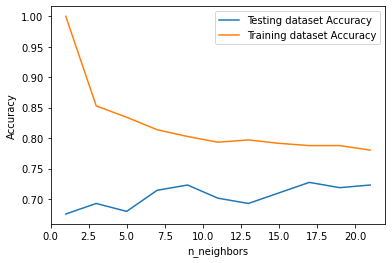

In [10]:
import numpy as np
import matplotlib.pyplot as plt
neighbors=[1,3,5,7,9,11,13,15,17,19,21]
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
acc=[]
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    print('Predicted Outcomes for neighbours =',k,'are', knn.predict(X2_test))
    print('\n')
    
    print('Accuracy = ',knn.score(X2_test, y2_test))
    if ((knn.score(X2_test, y2_test))>=0):
        acc.append(knn.score(X2_test, y2_test)) 
    print('\n')
    
    matrix = confusion_matrix(y2_test,knn.predict(X2_test))
    print('Confusion Matrix = ',matrix)
    print('\n\n')
    
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X2_train, y2_train)
    test_accuracy[i] = knn.score(X2_test, y2_test)
    
print(acc)
print('\n')
print('maximum accuracy is =', max(acc)*100)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')


  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Question 4. Split the data of each class from pima-indians-diabetes-Standardised.csv into
train data and test data. Train data should contain same 70% of tuples in Question 2 from
each of the class and test data contain remaining same 30% of tuples from each class. Save the

train data as diabetes-train-standardise.csv and save the test data as diabetes-
test-standardise.csv

a. Classify every test tuple using K-nearest neighbor (KNN) method for the different values
of K (1, 3, 5, 7, 9, 11, 13, 15, 17, 21). Perform the following analysis :
i. Find confusion matrix (use ‘confusion_matrix’) for each K.

ii. Find the classification accuracy (You can use ‘accuracy_score’) for each K. Note the
value of K for which the accuracy is high.

In [11]:
X3 = pid1_ss
X3
y3 = pid['class']
y3

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size = 0.7, random_state = 42)

print(X3_train)
print(y3_train)
print(X3_test)
print(y3_test)

[[-0.84488505 -0.81042491 -0.47073225 ... -1.02710391 -0.63989158
  -0.95646168]
 [ 0.3429808  -0.49745345  0.14964075 ...  0.62284628 -0.94492356
  -0.44593516]
 [-1.14185152  0.44146091 -0.05715025 ...  1.30821021 -0.32277912
  -0.78628618]
 ...
 [ 1.82781311 -0.62264204  0.87340925 ...  1.72704372  2.00573238
   0.40494237]
 [-1.14185152  0.62924378 -3.57259724 ...  1.32090213 -0.8059981
  -0.36084741]
 [-1.14185152  0.12848945  1.39038675 ... -1.20479085 -0.63385134
  -1.04154944]]
334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: class, Length: 537, dtype: int64
[[ 0.63994726 -0.71653347 -0.57412775 ...  0.25478047 -0.1264714
   0.83038113]
 [-0.54791859 -0.27837344  0.304734   ...  0.47054319 -0.97814487
  -1.04154944]
 [-0.54791859 -0.40356202 -0.26394125 ... -0.15136112 -0.94794368
  -1.04154944]
 ...
 [-1.14185152  0.19108374  0.56322275 ...  0.54669473  1.00305298
  -0.87137393]
 [ 0.63994726 -0.49745345  0.04624525 ... -

Predicted Outcomes for neighbours = 1 are [0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 0]


Accuracy =  0.6233766233766234


Confusion Matrix =  [[108  43]
 [ 44  36]]



Predicted Outcomes for neighbours = 3 are [0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 

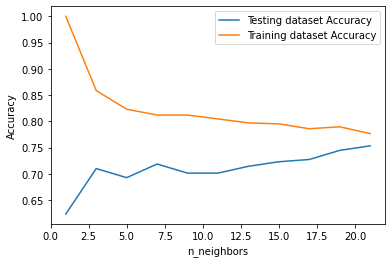

In [13]:
import numpy as np
import matplotlib.pyplot as plt
neighbors=[1,3,5,7,9,11,13,15,17,19,21]
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
acc=[]
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X3_train, y3_train)
    print('Predicted Outcomes for neighbours =',k,'are', knn.predict(X3_test))
    print('\n')
    
    print('Accuracy = ',knn.score(X3_test, y3_test))
    if ((knn.score(X3_test, y3_test))>=0):
        acc.append(knn.score(X3_test, y3_test))
    print('\n')
    
    matrix = confusion_matrix(y3_test,knn.predict(X3_test))   # evaluating the performance of a classification model 
    print('Confusion Matrix = ',matrix)
    print('\n\n')
    
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X3_train, y3_train)
    test_accuracy[i] = knn.score(X3_test, y3_test)

print(acc)
print('\n')
print('maximum accuracy is =', max(acc)*100)

    
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')


  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

6. Why the value of K is considered as odd integer?

Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction.
if k=even it will be difficult to choose class as the voting may be tied.